<a href="https://colab.research.google.com/github/wagnerquadros/python_code/blob/main/Avalia%C3%A7%C3%A3o_1_Classifica%C3%A7%C3%A3o_Bayesiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação Bayesiana

Realizar a classificação bayesiana da região alagada.
Criar duas classes, alagamento, e outra região de controle.

In [233]:
from PIL import Image
from skimage import data, io
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [234]:
image_path = 'satelite.jpeg'
im = Image.open(image_path)

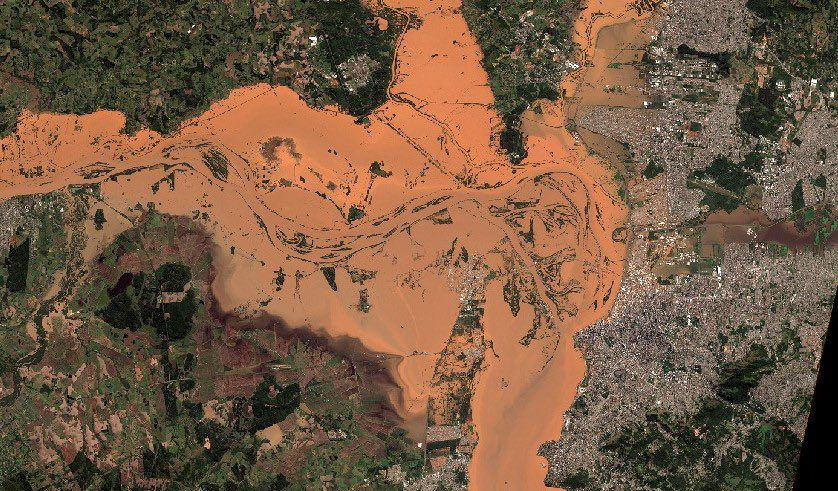

In [235]:
im

Agora iremos converter a imagem em um array. Assim, cada pixel da imagem será acessível como um elemento da matriz.

Após, será extraído o canal vermelho da imagem (componente R do espaço de cores RGB). Esta operação retorna uma matriz contendo apenas os valores de intensidade de vermelho para cada pixel na imagem.

array([[ 94,  72,  90, ...,  47,  52,  60],
       [ 75,  89,  97, ..., 112,  26,  48],
       [120,  99, 111, ..., 109,  62,  73],
       ...,
       [ 37,  48,  42, ...,   0,   0,   0],
       [ 53,  54,  49, ...,   0,   0,   0],
       [ 69,  60,  54, ...,   0,   0,   0]], dtype=uint8)
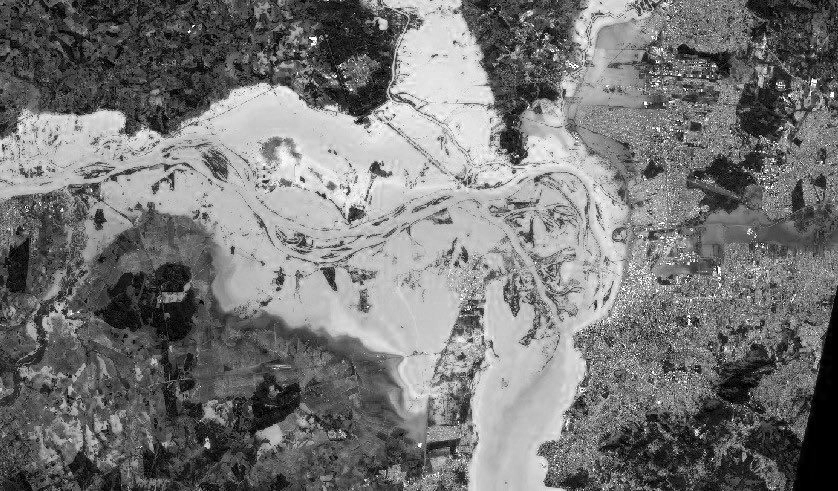

In [236]:
# Converte a imagem em um array
im_array = np.array(im)
im_array[:,:,0]



Definiremos uma área de interesse retangular 50x50  pixels, representando uma área de controle fora da região de alagamento.

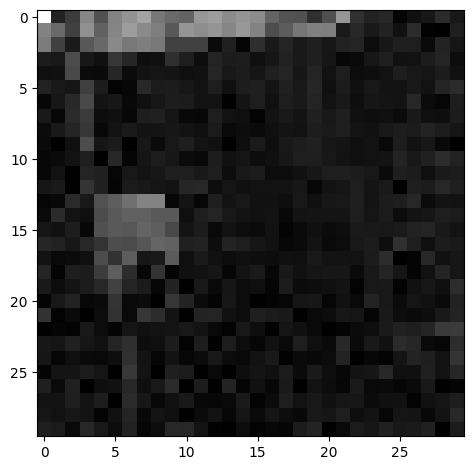

In [237]:
controle=im_array[300:330,160:190,0]
io.imshow(controle)

Agora definimos outra região de interesse  50x50 pixels, começando na posição representando a área de alagamento.

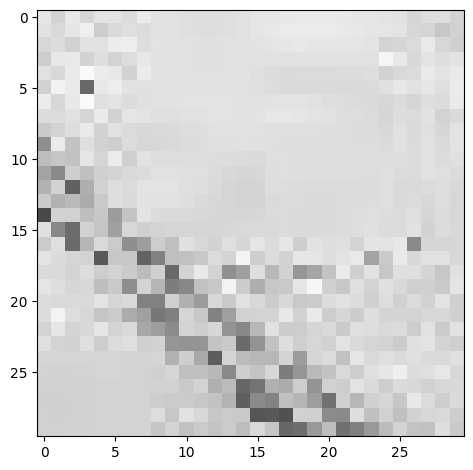

In [238]:
alagamento=im_array[120:150,400:430,0]
io.imshow(alagamento)

Calculamos a média e o desvio padrão para as duas áreas de interesse: controle e alagamento.

In [239]:
m1=np.mean(controle)
s1=np.std(controle)
print(m1)
print(s1)

28.84777777777778
29.283445182020422


In [240]:
m2=np.mean(alagamento)
s2=np.std(alagamento)
print(m2)
print(s2)

210.14333333333335
26.123393305192526


A função `posterioiri` calcula calcula a densidade de probabilidade para uma distribuição normal (Gaussiana).

In [241]:
def posteriori(x,m,s):
  p=st.norm.pdf((x-m)/s)
  return p

O gráfico abaixo permite visualizar e comparar as distribuições de probabilidade das duas áreas de interesse identificadas: contrle (linha azul) e alagamento (linha laranja).

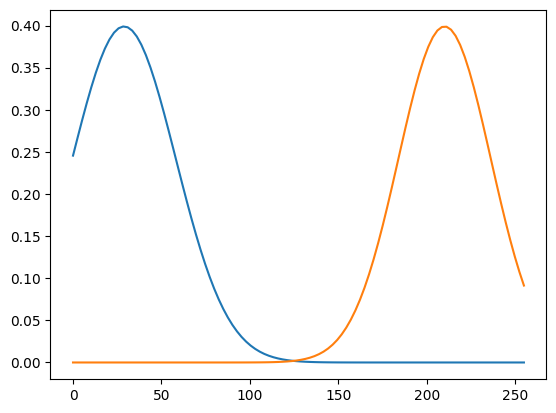

In [242]:
x=np.linspace(0,255,100)
plt.plot(x,posteriori(x,m1,s1))
plt.plot(x,posteriori(x,m2,s2))

In [243]:
[lin,col]=im_array[:,:,1].shape
print(lin)
print(col)

491
838


O código abaixo percorre cada pixel da imagem calculando a probabilidade dele ser classificado como "Controle" ou "Alagamento". O código então compara p1(probabilidade de pertencer a classe Controle) e p2 (probabilidade de pertencer a classe Alagamento). O código está classificando cada pixel da imagem com base nas probabilidades calculadas usando as distribuições verificadas no gráfico anterior.

In [244]:
ic=np.zeros([lin,col])
for l in range(lin):
  for c in range(col):
    p1=posteriori(im_array[l,c,2],m1,s1)
    p2=posteriori(im_array[l,c,2],m2,s2)
    if p1>=p2:
      ic[l,c]=1
    else:
      ic[l,c]=0

Após a execução, a matriz resultante `ic` conterá uma representação binária da classificação dos pixels da imagem com base nas probabilidades calculadas pelas funções posteriori. Áreas escuras foram classificadas como "Controle", ou seja, regiões não alagadas. Áreas claras foram classificadas como "Alagamento".

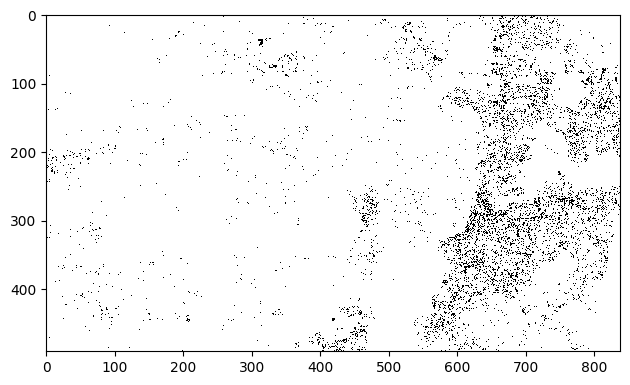

In [245]:
io.imshow(ic)

A seguir analisaremos o canal verde em busca de melhores resultados.

In [246]:
for l in range(lin):
    for c in range(col):
        p1 = posteriori(im_array[l, c, 1], m1, s1)
        p2 = posteriori(im_array[l, c, 1], m2, s2)
        if p1 >= p2:
            ic[l, c] = 1
        else:
            ic[l, c] = 0

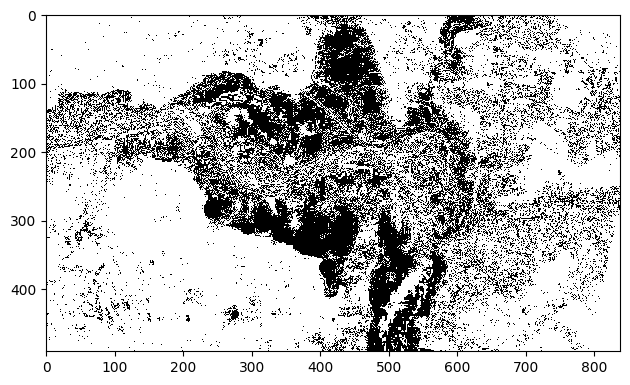

In [247]:
io.imshow(ic)

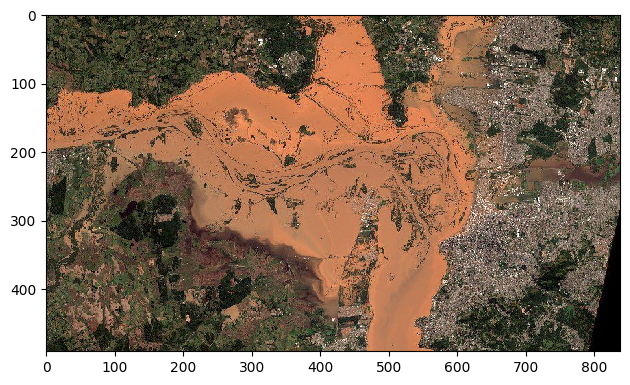

In [248]:
io.imshow(im_array)

# Segunda análise

Definição das classes

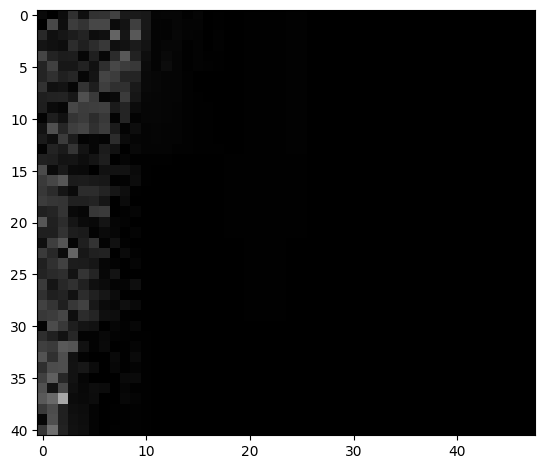

In [249]:
controle=im_array[450:500,790:840,0]
io.imshow(controle)

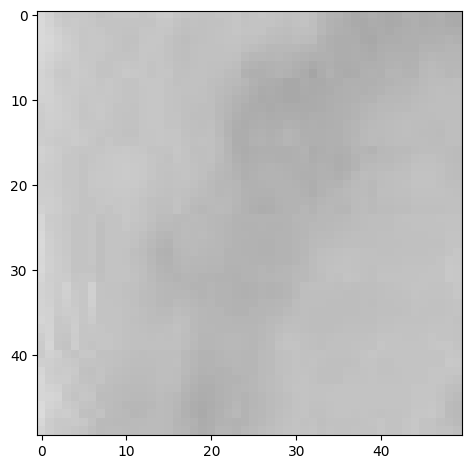

In [250]:
alagamento=im_array[400:450,480:530,0]
io.imshow(alagamento)

Cálculo das médias e desvio padrão.

In [251]:
m1=np.mean(controle)
s1=np.std(controle)

m2=np.mean(alagamento)
s2=np.std(alagamento)

In [252]:
def posteriori(x,m,s):
  p=st.norm.pdf((x-m)/s)
  return p

In [255]:
[lin,col]=im_array[:,:,1].shape

for l in range(lin):
    for c in range(col):
        p1 = posteriori(im_array[l, c, 1], m1, s1)
        p2 = posteriori(im_array[l, c, 1], m2, s2)
        if p1 >= p2:
            ic[l, c] = 1
        else:
            ic[l, c] = 0

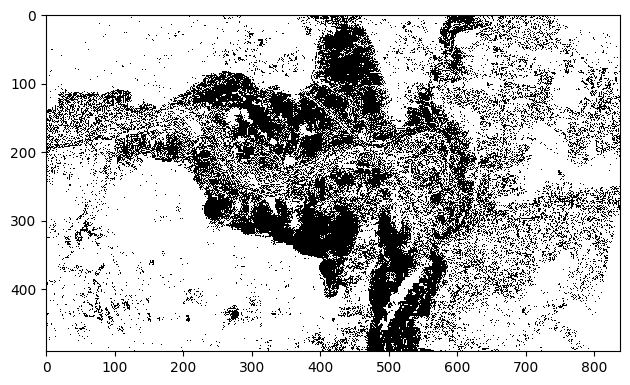

In [256]:
io.imshow(ic)